<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Andrew Gillock

EID: apg2255

Name: Benjamin Kanarick

EID: bjk2437

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

## CatBoost

### Advantages

An advantage of CatBoost is it's design for categorical data, which means it is able to perform classification and ranking better than most boosting methods. CatBoost shines in its ability to perform one-hot encoding of categorical variables quickly and effectively through the use of the one_hot_max_size parameter. This means that all features containing less than a specified amount of categories are quickly converted into a useable form without having to modify a large number of variables. Furthermore, prediction time of CatBoost models has been known to be significantly faster, have minimal overfitting and tuning time than boosting methods such as XGBoost. These advantages may only be clear when considering a model with lots of categorical features after tuning the one_hot_max_size parameter. 

### Disadvantages

A disadvantage of CatBoost would be its increase in training time due to the algorithm's identification of categorical data. In the article mentioned above, CatBoost had faster training time than XGBoost, but was relatively slower when compared LightGBM. These shortcomings are negligible when considering the overall performance of CatBoost on categorical data. 


## XGBoost

### Advantages

An advantage of XGBoost is its history and widespread use, which suggests that learning resources are more prevalent and the community is more familiar with this algorithm. Furthermore, XGBoost can be used for most regression, classification, and ranking objectives desired by most users, and offer great prediction accuracy that is comparable to CatBoost when presented with certain types of data. Another advantage is that regularization can be introduced to XGBoost by modifying the similarity score function used to calculate gain, which determines if pruning should occur.

### Disadvantages

A disadvantage of XGBoost is its incredibly slow training, prediction, and parameter tuning time. It is simply too slow to consider a gridsearch for each hyperparameter in the model, meaning these parameters are better off being tuned individually. Furthermore, XGBoost offers no hyperparameters specifically for categorical data, which makes it less desirable in situations such as the one presented in the article above where a majority of the data is categorical. 

# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [1]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [2]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3750, 10) (3750,)
test (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
columns_list = list(X.columns)
y_test.value_counts()

0    1165
1      85
Name: SeriousDlqin2yrs, dtype: int64

In [5]:
# Part a)

# create instance of classifier and fit to training data
clf = DecisionTreeClassifier(random_state = 14)
clf.fit(X_train, y_train)

# predict using test data
y_hat = clf.predict(X_test)

# report accuracy_score & roc_auc_score
print('Decision Tree')
print()
print('Accuracy Score: ', accuracy_score(y_test, y_hat))
print('ROC/AUC Score: ', roc_auc_score(y_test, y_hat))

Decision Tree

Accuracy Score:  0.888
ROC/AUC Score:  0.5854582176218127


In [6]:
# Part b)

# create instance of classifier and fit to training data
clf = BaggingClassifier(random_state = 14, n_estimators= 25)
clf.fit(X_train, y_train)

# predict on test data
y_hat = clf.predict(X_test)

# report accuracy_score & roc_auc_score
print('Bagging')
print()
print('Accuracy Score: ', accuracy_score(y_test, y_hat))
print('ROC/AUC Score: ', roc_auc_score(y_test, y_hat))

Bagging

Accuracy Score:  0.9256
ROC/AUC Score:  0.556551375915173


In [7]:
# Part c)

# create instance of RF classifier
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)
grid_search.fit(X_train, y_train)

# predict on test data using best parameters
y_hat = grid_search.predict(X_test)

# report best model parameters, accuracy_score & roc_auc_score
print('Random Forest')
print()
print('Best model parameters: ', grid_search.best_params_)
print('Accuracy Score: ', accuracy_score(y_test, y_hat))
print('ROC/AUC Score: ', roc_auc_score(y_test, y_hat))

# print confusion matrix
print(confusion_matrix(y_test, y_hat))

Random Forest

Best model parameters:  {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100, 'random_state': 17}
Accuracy Score:  0.932
ROC/AUC Score:  0.5163595051754608
[[1162    3]
 [  82    3]]


In [8]:
# Part d)

# create instance of AdaBoost classifier
clf = AdaBoostClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)
grid_search.fit(X_train, y_train)

# predict on test data using best parameters
y_hat = grid_search.predict(X_test)

# report best model parameters, accuracy_score & roc_auc_score
print('AdaBoost')
print()
print('Best model parameters: ', grid_search.best_params_)
print('Accuracy Score: ', accuracy_score(y_test, y_hat))
print('ROC/AUC Score: ', roc_auc_score(y_test, y_hat))

# print confusion matrix
print(confusion_matrix(y_test, y_hat))

AdaBoost

Best model parameters:  {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
Accuracy Score:  0.9328
ROC/AUC Score:  0.5713203736430194
[[1153   12]
 [  72   13]]


In [9]:
# Part e)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }
# Grid search
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)
grid_search.fit(X_train, y_train)

# predict on test data using best parameters
y_hat = grid_search.predict(X_test)

# report best model parameters, accuracy_score & roc_auc_score
print('Gradient Boosting')
print()
print('Best model parameters: ', grid_search.best_params_)
print('Accuracy Score: ', accuracy_score(y_test, y_hat))
print('ROC/AUC Score: ', roc_auc_score(y_test, y_hat))

# print confusion matrix
print(confusion_matrix(y_test, y_hat))

Gradient Boosting

Best model parameters:  {'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}
Accuracy Score:  0.932
ROC/AUC Score:  0.5054531683918203
[[1164    1]
 [  84    1]]


Part f)

When comparing the performance of a single decision tree to ensemble methods, it's clear that the ensemble methods achieve better prediction accuracy. This is due to ensemble methods combining the prediction power of multiple decision trees. Interestingly, the single decision tree had the greatest AUC/ROC score but only marginally better than Adaboost.

The AdaBoost model performed the best out of the ensemble methods in terms of prediction accuracy. This is likely due to the AdaBoost algorithm, which assigns different weights to each tree based on their residual error. Furthermore, the initial model receives less weight as more improved models are added into the ensemble. This ensures that the strongest learners have the most influence on final classification. AdaBoost tends to utilize decision trees with a single node, also known as a 'stump'. The idea is to combine these high bias stumps, which individually are weak learners, but when combined achieve greater prediction accuracy.

We see similar accuracy scores for both the Random Forest and Gradient Boosting models, but neither yield the same benefits as AdaBoost. The RF model seeks to decrease the correlation of decision trees in the ensemble by randomly selecting a subset of *m* features from all predictors *p*. The trees are built independent of one another and do not consider mistakes from previously generated trees. The GB model fits trees to the residuals of the previous tree, meaning each subsequent tree attempts to lower the errors of the former. Additionally, this process is controlled by a tuning parameter that controls the learning rate of each tree. The higher this value, the more influence each tree has in computing the predicted class. AdaBoost works similarly, but can assign different weights to each tree depending on its prediction accuracy. Since AdaBoost utilizes mainly stumps, it is significantly faster than the Random Forest algorithm.


# Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [15]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.902 s
predict time 0.009 s
XGBoost conf matrix: 
[[794 206]
 [228 772]]
Accuracy: 0.783
 AUC_ROC: 0.856863

Originally Imbalanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.834 s
predict time 0.008 s
XGBoost conf matrix: 
[[1843   23]
 [ 114   20]]
Accuracy: 0.9315
 AUC_ROC: 0.8342691686263217

Highly Imbalanced Dataset
{'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 17}
training time 0.778 s
predict time 0.006 s
XGBoost conf matrix: 
[[1945    5]
 [  50    0]]
Accuracy: 0.9725
 AUC_ROC: 0.8398564102564102



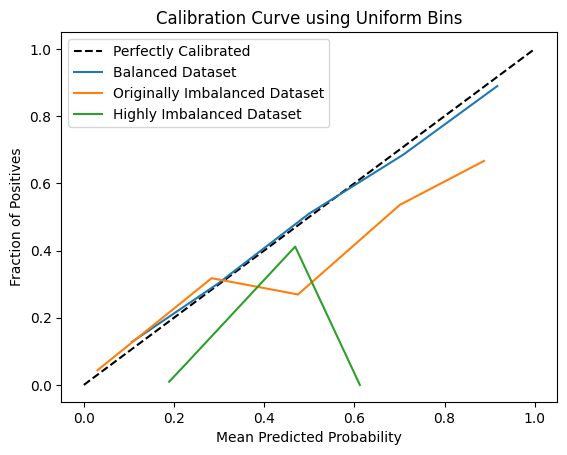

In [42]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# reference line
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.plot(x, y, 'k', linestyle = '--', label = 'Perfectly Calibrated')

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)
x1, y1 = calibration_curve(y_test1, y_pred_proba1)
plt.plot(y1, x1, label = 'Balanced Dataset')

x2, y2 = calibration_curve(y_test2, y_pred_proba2)
plt.plot(y2, x2, label = 'Originally Imbalanced Dataset')

x3, y3 = calibration_curve(y_test3, y_pred_proba3)
plt.plot(y3, x3, label = 'Highly Imbalanced Dataset')
plt.legend(loc = 'best')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve using Uniform Bins')
plt.show()


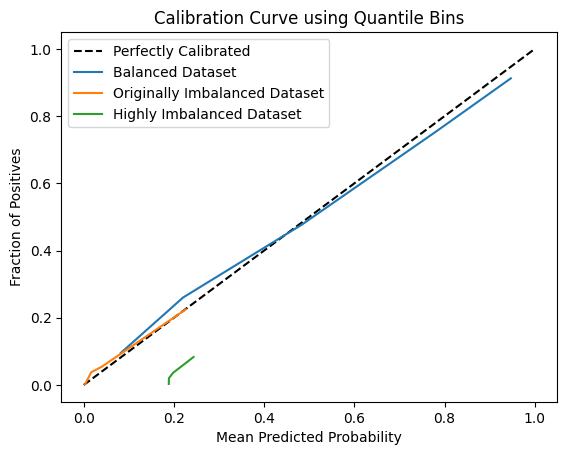

In [43]:
# reference line
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.plot(x, y, 'k', linestyle = '--', label = 'Perfectly Calibrated')

#Plot all calibration curves for strategy = 'quantile'
x1, y1 = calibration_curve(y_test1, y_pred_proba1, strategy = 'quantile')
plt.plot(y1, x1, label = 'Balanced Dataset')

x2, y2 = calibration_curve(y_test2, y_pred_proba2, strategy = 'quantile')
plt.plot(y2, x2, label = 'Originally Imbalanced Dataset')

x3, y3 = calibration_curve(y_test3, y_pred_proba3, strategy = 'quantile')
plt.plot(y3, x3, label = 'Highly Imbalanced Dataset')
plt.legend(loc = 'best')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve using Quantile Bins')
plt.show()

In both cases, the balanced dataset was calibrated the best. In fact, the balanced datset was the only dataset that directly followed the perfect calibration line for the entirety of modeled probabilities. A balanced dataset is one where each class is roughly equally represented. Having unequal representation of classes can result in heavily skewed output since the model is not informed about all categories equally. Additionally, the quantile binning strategy seemed to perform better overall than the uniform binning strategy. We can assume that this is due to the quantile method placing the same number of observations in each bin and their dependence on the actual probability. Alternatively, uniform bins have identical widths, but may contain a different amount of observations in each bin.

# Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) **[2.5 pts]** Skip connections <br>
b) **[2.5 pts]** Batch normalization

a)

An issue that is commonly encountered when fitting deep learning models is decreased model performance on training data as the network increases in depth. This is known as *degradation*, which can be due to the random initialization of parameter weights around zero. This would result in subsequent layers being unable to contribute much to the final output of the model. *Skip connections* are able to skip certain layers of the network and reduce the complications of degradation by modifying the surface of the neural network. Reducing local minima/maxima leads to a faster convergence than networks built without skip connections. Common examples of skip connections are residual networks (ResNets), which utilizes matrix addition of outputs from previous layers. This results in no additional parameters since the output from the previous layer is added to the next subsequent layer. Another example of skip connections are densely connected convulational networks (DenseNets), which concatenate the outputs from previous layers rather than summing them. The main benefit of DenseNets is *feature reusability*, which refers to the idea that features learned from early layers in the network can be reused in deeper layers. DenseNets are able to learn subsequent mappings with significantly fewer parameters than a tradtional convulutional neural network since no redundant mappings are necessary.

b)

Another issue presented by deep neural networks is their sensitivity to randomized intitial weights. Furthermore, these weights are updated after every backpropagation of error and are unlikely to remain static, which means many epochs or passes through the data are required for network training. *Batch Normalization* is a technique for training deep networks that works by standardizing the inputs of a layer for each mini-batch, which is applied to either the activations of a prior layer or inputs directly. This normalization process accelerates training and provides regularization, which reduces generalization error and drastically reduces the number of training epochs required by deep networks.
